<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Prepare-Dataset" data-toc-modified-id="Prepare-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Dataset</a></span></li><li><span><a href="#Plotting-with-Pandas" data-toc-modified-id="Plotting-with-Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting with Pandas</a></span></li><li><span><a href="#Pandas-Groupby-Plotting" data-toc-modified-id="Pandas-Groupby-Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pandas Groupby Plotting</a></span></li><li><span><a href="#Creating-Multiple-Plots-in-One-Go" data-toc-modified-id="Creating-Multiple-Plots-in-One-Go-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating Multiple Plots in One Go</a></span></li><li><span><a href="#Custom-Operations-with-AxesSubplots" data-toc-modified-id="Custom-Operations-with-AxesSubplots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Custom Operations with AxesSubplots</a></span><ul class="toc-item"><li><span><a href="#Case-1:-Overlaying-Multiple-Information-in-a-Single-Plot" data-toc-modified-id="Case-1:-Overlaying-Multiple-Information-in-a-Single-Plot-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Case 1: Overlaying Multiple Information in a Single Plot</a></span></li><li><span><a href="#Case-2:-Show-Multiple-Information-in-Multiple-Plots,-in-One-Figure" data-toc-modified-id="Case-2:-Show-Multiple-Information-in-Multiple-Plots,-in-One-Figure-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Case 2: Show Multiple Information in Multiple Plots, in One Figure</a></span></li></ul></li><li><span><a href="#Pandas-Plotting-Backends" data-toc-modified-id="Pandas-Plotting-Backends-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pandas Plotting Backends</a></span></li><li><span><a href="#Ending-Notes" data-toc-modified-id="Ending-Notes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ending Notes</a></span></li><li><span><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction

In my day-to-day job, I work with Pandas to wrangle and extract information from a given dataset. 

Plotting is an integral part of my job because plots communicate information quickly and easily.

**A picture is worth a thousand words**. Is something up? Is something down? Is A and B the same? Rather than looking at a bunch of numbers, you can find patterns in split-second by using plots. 

See how I use the boring expression at the start of the previous paragraph? Isn't that quicker than me creating a long paragraph stating the exact same thing? I am wasting your time with this paragraph but I want you to see the general idea. This is the same reason why plotting matters. **Plotting gives you the general idea faster**.

Stakeholders typically appreciate plots because of the same reason I use it for myself. Everyone's time is saved when you give them plots as a start. When they need to go through the actual numbers, they will ask. 

---

This is a quick go-through of Pandas plotting functions. This article only contains functions I consider to be important in my day-to-day work. 

If you need more complex/detailed description of the functions, consider going through the actual documentation of the package.

# Prepare Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Plotting with Pandas

Pandas provide a shortcut function to plot data. 

Let's start with a very bare-bone call to the method.

<AxesSubplot:>

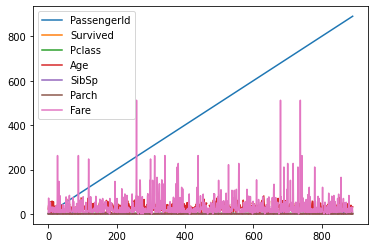

In [4]:
df.plot()

*Something* come out. It does not explain anything, but it is a start.

Let's try to answer something by visualizing it: What is the distribution of `Pclass`?

This is the dataset I generated using the chain function above for plotting.


,Pclass
1,216
2,184
3,491


<AxesSubplot:title={'center':'Titanic Passenger Class Count'}>

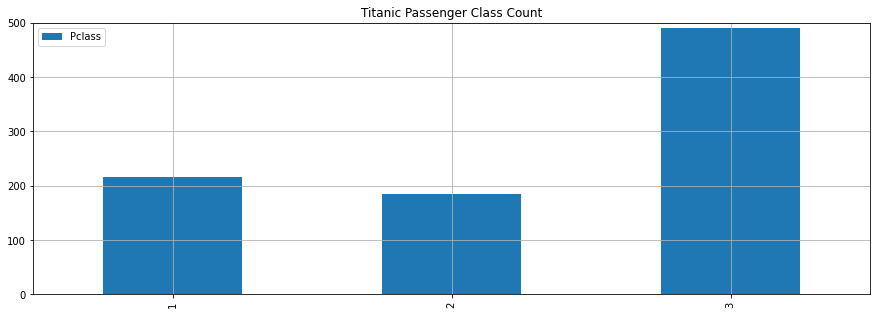

In [45]:
X = df["Pclass"].value_counts().sort_index().copy()

print("This is the dataset I generated using the chain function above for plotting.")
display(X.to_frame())

X\
.plot(
    kind="bar",
    grid=True,
    legend=True,
    title="Titanic Passenger Class Count",
    
    figsize=(15,5),
    xlim=(0,5), ylim=(0,500),
    
    backend="matplotlib",
)

Notice that I preprocessed the `pd.DataFrame` before to a `pd.Series` containing the answer to my question.

More importantly, notice that I put in a lot of arguments in the plot method now. In the order they are presented as arguments, they are:

| Argument | Data Type | Description |
| --- | --- | --- |
| `kind` | str | The kind of plot to produce. Options are: <br>\[ `line`, `bar`, `barh`, `hist`, `box`, `kde`, <br>`density`, `area`, `pie`, `scatter`, `hexbin` \] |
| `grid` | bool | Axis grid lines. <br>Notice the light-gray boxes in the second plot? |
| `legend` | bool | Place legend on axis subplots |
| `title` | str | Title to use for the plot |
| `figsize` | tuple | Figure size, (width, height) in inches |
| `xlim` | tuple | Set x-limits of the current axes |
| `ylim` | tuple | Set y-limits of the current axes |
| `backend` | str | Which plotting backend to use. Go to [Pandas Plotting Backend](#Bonus:-Pandas-Plotting-Backends)

Notice also that the bare-bone call to the method returns a plot. Matplotlib (and thus Pandas) has default values for all the arguments, so you may not need to know and understand every arguments out there.

All the available arguments in detail can be read in [Pandas `plot` Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Generally speaking, the arguments I listed above are the ones I use on a day-to-day basis. There are also some I use depending on the `kind` of the plot, which I will show in later sections.

# Pandas Groupby Plotting

Pandas plotting does not understand multi-index easily. Always use single-index as it is the one that will be used as X-axis. 

The function `unstack` or `melt` may help a lot here.

This is the dataset I generated using the chain function above for plotting.


Sex,female,male
Age,,
"(0.419, 19.0]",0.706667,0.292135
"(19.0, 25.0]",0.723404,0.122222
"(25.0, 31.8]",0.727273,0.216867
"(31.8, 41.0]",0.843137,0.215054
"(41.0, 80.0]",0.795455,0.183673


<AxesSubplot:xlabel='Age'>

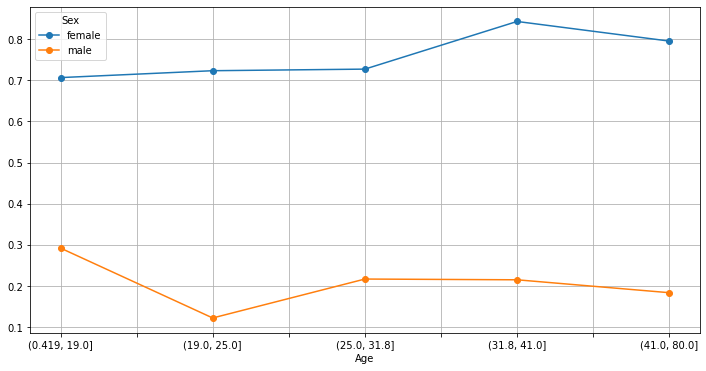

In [92]:
kwargs = {
    "grid": True,
    "figsize": (12, 6),
    "style": "o-",
}

X = df.groupby([
    "Sex", pd.qcut(df["Age"], q=5, duplicates="drop")
])["Survived"].mean().unstack(level=0)

print("This is the dataset I generated using the chain function above for plotting.")
display(X)

X.plot(**kwargs, kind="line")

# Creating Multiple Plots in One Go

Pandas has a shortcut argument to create multiple plots in a single Pandas command with `subplots=True`. It plots each column into single plot. 

This is the dataset I generated using the chain function above for plotting.


Sex,female,male
Age,,
"(0.419, 19.0]",0.706667,0.292135
"(19.0, 25.0]",0.723404,0.122222
"(25.0, 31.8]",0.727273,0.216867
"(31.8, 41.0]",0.843137,0.215054
"(41.0, 80.0]",0.795455,0.183673


array([[<AxesSubplot:title={'center':'female'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'male'}, xlabel='Age'>]],
      dtype=object)

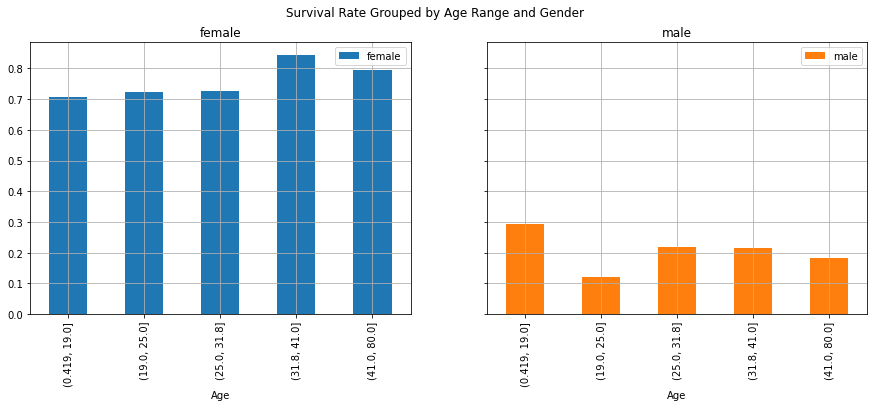

In [47]:
X = df.groupby([
    df["Sex"],
    pd.qcut(df["Age"], q=5, duplicates="drop")
])["Survived"].mean().unstack(level=0)

print("This is the dataset I generated using the chain function above for plotting.")
display(X)

X.plot(
    kind="bar", 
    grid=True,
    legend=False,
    title="Survival Rate Grouped by Age Range and Gender",
    
    figsize=(15,5), 

    subplots=True, layout=(1,2),
    sharex=True, sharey=True,
)

In my sample `pd.DataFrame` above, I have 2 columns: `male` and `female`. Adding `subplots=True` plots the 2 columns into 2 separate plots.

Some new arguments shown in this section:

| Argument | Data Type | Description |
| --- | --- | --- |
| `subplots` | bool | Make separate subplots for each column |
| `layout` | tuple | (rows, columns) for the layout of subplots. <br>In my example, I choose subplots of 1 row and 2 columns. |
| `sharex` | bool | Shortcut to set the same `xlim` for all plot in subplots |
| `sharey` | bool | Shortcut to set the same `ylim` for all plot in subplots |

This [Pandas `subplot` Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#subplots) might be useful.

---

# Custom Operations with AxesSubplots

Notice something here. In the section [Plotting with Pandas](http://localhost:8888/notebooks/PycharmProjects/ScratchPads/2021Dec26%20-%20Matplotlib%20Tutorial.ipynb#Plotting-with-Pandas), the output returned by Pandas is:

```
<AxesSubplot:title={'center':'Titanic Passenger Class Count'}>
```

While now it is:

```
array([[<AxesSubplot:title={'center':'female'}, xlabel='Age'>,
        <AxesSubplot:title={'center':'male'}, xlabel='Age'>]],
      dtype=object)
```

The argument `subplots=True` returns the same object as when you ask for a single plot: `AxesSubplot`. The difference is that now it is a list/array of `AxesSubplot`.

To understand why this matters, you need to know a bit about Matplotlib class of `Figure` and `AxesSubplot`. 

Check out this Matplotlib helper function to create subplots.

(<Figure size 1080x360 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

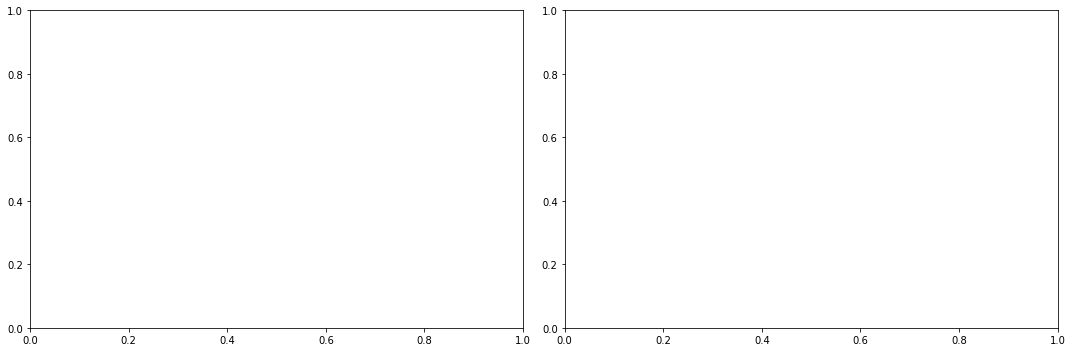

In [49]:
plt.subplots(
    nrows=1, ncols=2,
    figsize=(15, 5),
    tight_layout=True
)

The function returns a tuple of (`Figure`, array(\[`AxesSubplot`\])). 

Think of `Figure` as the frame containing single/multiple `AxesSubplot`. I generally do not process `Figure` much, but care a whole deal with the array of `AxesSubplot`. 

What Pandas does with the argument `subplots=True` is create a tuple of (`Figure`, array(\[`AxesSubplot`\])), and send the intended data to be visualized into specified `AxesSubplot`. This link to a [TowardsDataScience article](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca)  explains it in more detail.

Let me try making the exact same subplots without Pandas shortcut function.

This is the dataset I generated using the chain function above for plotting.


Sex,female,male
Age,,
"(0.419, 19.0]",0.706667,0.292135
"(19.0, 25.0]",0.723404,0.122222
"(25.0, 31.8]",0.727273,0.216867
"(31.8, 41.0]",0.843137,0.215054
"(41.0, 80.0]",0.795455,0.183673


<AxesSubplot:title={'center':'male'}, xlabel='Age'>

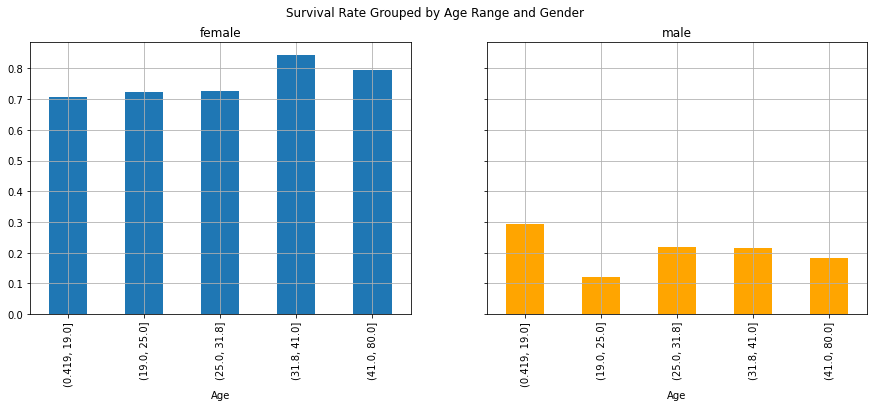

In [57]:
X = df.groupby([
    df["Sex"],
    pd.qcut(df["Age"], q=5, duplicates="drop")
])["Survived"].mean().unstack(level=0)

print("This is the dataset I generated using the chain function above for plotting.")
display(X)

fig, axes = plt.subplots(
    nrows=1, ncols=2, 
    figsize=(15,5),
    sharey=True
)
fig.suptitle("Survival Rate Grouped by Age Range and Gender")

X["female"].plot(
    kind="bar",
    grid=True,
    legend=False,
    title="female",
    
    ax=axes[0]
)

X["male"].plot(
    kind="bar",
    grid=True,
    legend=False,
    title="male",
    color="orange",
    ax=axes[1]
)

The color for the male gender is slightly off, but it gives us the same plots as the previous section. The big things to notice:

1. There is a variable `suptitle` in the `Figure` object which gives me the title over both plots.
2. When I plot single `pd.Series` once each for female and male gender, I pass over an argument `ax`.

Point 2 is important here. Pandas by default creates a new `AxesSubplot` when you do not supply the argument `ax`. This means different `AxesSubplot` for every plot created. 

When you do supply the argument `ax`, Pandas will direct the created plot to said `ax`. You can design however you want a plot/subplots to look like!

Here are 2 cases I generally find I want to do.

## Case 1: Overlaying Multiple Information in a Single Plot

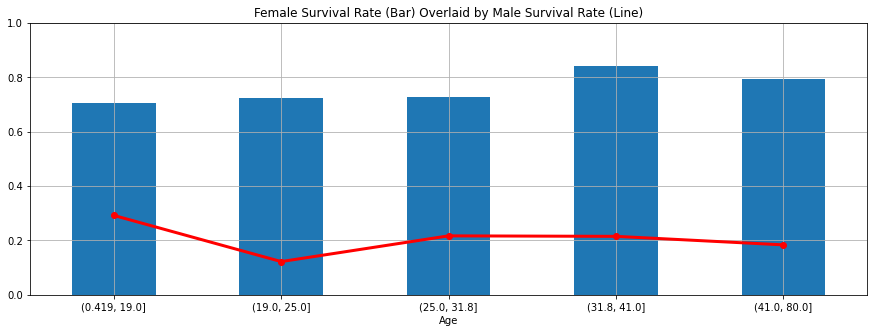

In [65]:
# A helper function to create an ax
# ax = plt.subplot(111)

# You can also use plt.subplots without nrow and ncol argument
fig, ax = plt.subplots(
    figsize=(15,5)
)

X["female"].plot(
    kind="bar",
    ax=ax
)

X["male"].plot(
    kind="line",
    style="ro-",
    linewidth=3,
    ax=ax
)

# Notice that you can set AxesSubplot variables easily this way
ax.set_title("Female Survival Rate (Bar) Overlaid by Male Survival Rate (Line)")
ax.set_ylim([0, 1])
ax.grid()

## Case 2: Show Multiple Information in Multiple Plots, in One Figure

Using the information from the leading section, let me show all kind of plots you can create with Matplotlib on Pandas.

I will use this example to show all Matplotlib Plot `kind` you can create in Pandas.

<AxesSubplot:title={'center':'Hexbin Plot - Titanic Age Distribution by Fare'}, xlabel='Age', ylabel='Fare'>

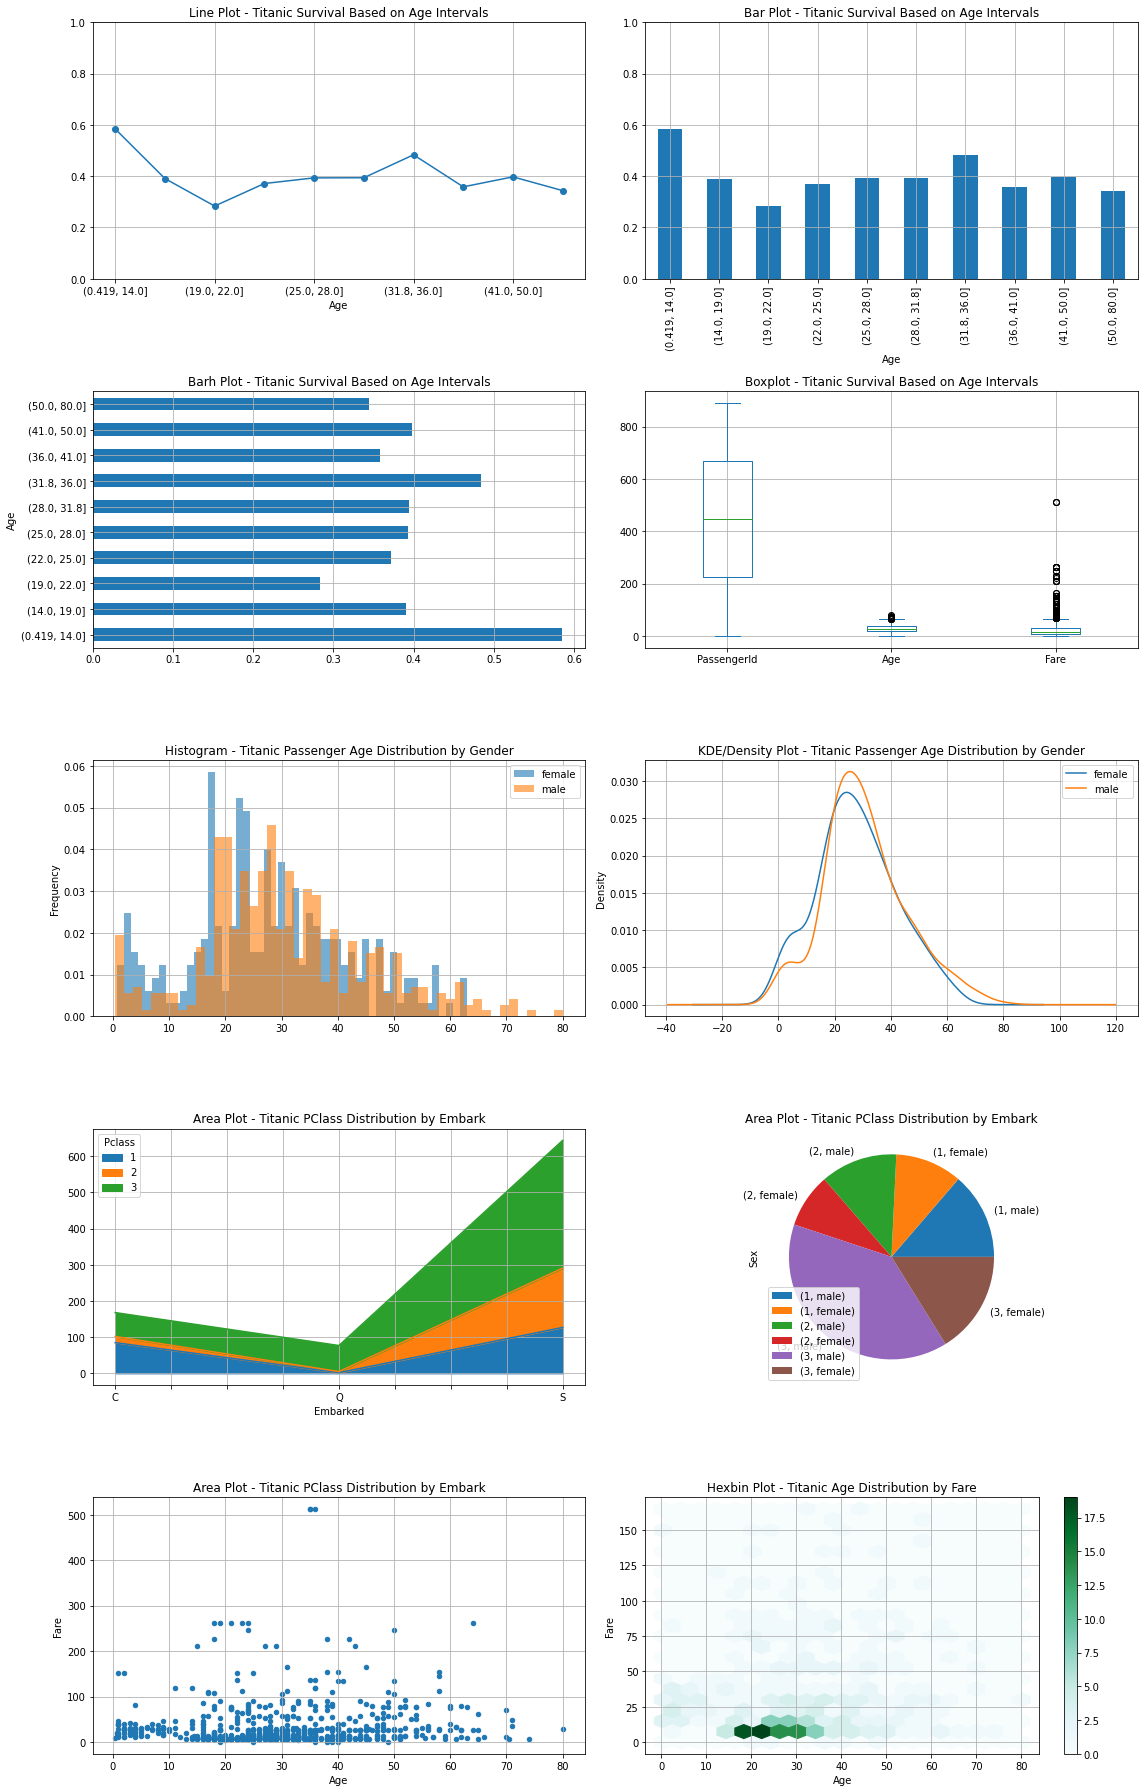

In [94]:
def generate_subplot_tuple(nrows, ncols, figsize_each):
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, 
        figsize=(figsize_each[0]*ncols, figsize_each[1]*nrows),
        tight_layout=True
    )
    return fig, axes

fig, (
    (ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)
) = generate_subplot_tuple(nrows=5, ncols=2, figsize_each=(8, 5))

axes = axes.flatten()

X = df[["Age", "Survived"]].copy()
X = X.groupby([pd.qcut(X["Age"], q=10, duplicates="drop")])\
["Survived"].agg(["count", "sum", "mean"])

X["mean"].plot(
    kind="line", style="o-",
    grid=True, ylim=(0,1), 
    ax=ax1, title="Line Plot - Titanic Survival Based on Age Intervals",
)
X["mean"].plot(
    kind="bar",
    grid=True, ylim=(0,1),
    ax=ax2, title="Bar Plot - Titanic Survival Based on Age Intervals",
)
X["mean"].plot(
    kind="barh",
    grid=True, ylim=(0,1),
    ax=ax3, title="Barh Plot - Titanic Survival Based on Age Intervals",
)

X = df[["PassengerId", "Age", "Fare"]].copy()

X.plot(
    kind="box",
    grid=True, legend=True,
    ax=ax4, title="Boxplot - Titanic Survival Based on Age Intervals",
)

X = df[["Age", "Sex", "Pclass", "Embarked", "Survived"]].copy()

X.groupby(["Sex"])["Age"].plot(
    kind="hist", bins=50, alpha=0.6, density=True, 
    # False=Count, True=Frequency
    grid=True, legend=True,
    ax=ax5, title="Histogram - Titanic Passenger Age Distribution by Gender",  
)

X.groupby(["Sex"])["Age"].plot(
    kind="kde",
    grid=True, legend=True,
    ax=ax6, title="KDE/Density Plot - Titanic Passenger Age Distribution by Gender",
)

X = df[["Pclass", "Embarked", "PassengerId", "Age", "Fare", "Sex"]].copy()

X.groupby(["Pclass", "Embarked"]).size().unstack(level=0).plot(
    kind="area", stacked=True,
    grid=True, legend=True,
    ax=ax7, title="Area Plot - Titanic PClass Distribution by Embark",
)

X.groupby(["Pclass"])["Sex"].value_counts().plot(
    kind="pie",
    grid=True, legend=True,
    ax=ax8, title="Area Plot - Titanic PClass Distribution by Embark",
)

X.plot(
    kind="scatter",
    x="Age", y="Fare",
    grid=True, legend=True,
    ax=ax9, title="Area Plot - Titanic PClass Distribution by Embark",
)

X[X["Fare"]<200].plot(
    kind="hexbin", gridsize=20, bins=20,
    x="Age", y="Fare",
    grid=True, legend=True,
    ax=ax10, title="Hexbin Plot - Titanic Age Distribution by Fare",
)

# Pandas Plotting Backends

By default, Pandas `plot` will return a Matplotlib plot. You can however change the backend used for plotting **while keeping majority of the same plotting syntax you are used to**. 

List of supported Plotting Backends are listed in [this page](https://pandas.pydata.org/pandas-docs/dev/ecosystem.html#visualization).

I use Plotly for better visualization and real-time hover capability. To use it with Pandas, I have historically been using a third-party package called [Cufflinks](https://github.com/santosjorge/cufflinks). 

I am currently trying to move to using Plotly directly with Pandas to lower the number of dependencies involved.

```
# You can set the plotting backend for every pandas plot.
pd.options.plotting.backend = "plotly" # Default: "matplotlib"

# Or, customize the backend for any plot.
df.plot(backend="plotly")
```

# Ending Notes

Generally all simple plots can be made with shortcuts already provided by Pandas (and its plotting backends). You just need to arrange your data to follow what is expected by Pandas for it to produce the plots.

When you need to do more difficult visualization, it never hurts to read the documentation and example code of the plotters, such as one here for [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html).

# References


1. [Pandas Plot Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
2. [Chart Visualization (contains info about subplots + other useful info)](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#)
3. [Matplotlib Figure, AxesSubplot in Detail](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca)
4. [Pandas Plotting Backend](https://pandas.pydata.org/pandas-docs/dev/ecosystem.html#visualization)
5. [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)